In [1]:
#dependencies
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential, Model, model_from_json
from keras.layers import Conv2D, Activation, MaxPool2D, Dropout, Dense, BatchNormalization, Flatten
from keras.callbacks import ModelCheckpoint
import tarfile

ModuleNotFoundError: No module named 'keras'

In [ ]:
#dataset
# data_comp = tarfile.open("fer2013.tar") 
ds = pd.read_csv("fer2013.csv")
ds.head()
#0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral

In [ ]:
ds["Usage"].value_counts()

In [ ]:
train = ds[["emotion", "pixels"]][ds["Usage"] == "Training"]
train['pixels'] = train['pixels'].apply(lambda x: np.fromstring(x, sep=' '))
train_pix = np.vstack(train['pixels'].values)
test = ds[["emotion", "pixels"]][ds["Usage"] == "PublicTest"]
test['pixels'] = test['pixels'].apply(lambda x: np.fromstring(x, sep=' '))
test_pix = np.vstack(test['pixels'].values)
train_pix.shape, test_pix.shape

In [ ]:
#0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral
#0=angry, 1=disgust+fear+surprise, 3=Happy, 4=sad, 6= neutral
#apending 2 and 5 to 1; 5 to 2; 6 to 4
#:::: set append = false to avoid changes
def e_ind(x):
    if(x==2 or x==5):
        return 1
    elif(x==5):
        return 2
    elif(x==6):
        return 4
    else:
        return x
F_S_D = False
if(F_S_D):
    train['emotion'] = train['emotion'].apply(lambda x: e_ind(x))
    test['emotion'] = test['emotion'].apply(lambda x: e_ind(x))
train_ind = np.array(train["emotion"])
test_ind = np.array(test["emotion"])
train_ind.shape, test_ind.shape

In [ ]:
train_pix = train_pix.reshape(-1,48,48,1)
train_ind = np_utils.to_categorical(train_ind)
test_pix = test_pix.reshape(-1,48,48,1)
test_ind = np_utils.to_categorical(test_ind)
train_ind.shape, test_ind.shape
#train_pix.shape, test_pix.shape

In [ ]:
model = Sequential()
model.add(Conv2D(64, 5, data_format="channels_last", kernel_initializer="he_normal", 
                 input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(Conv2D(64, 4))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.5))

model.add(Conv2D(32, 3))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(Conv2D(32, 3))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.2))

# if(F_S_D):
#     model.add(Dense(5))
# else:
model.add(Dense(7))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

In [2]:
# checkpoint
checkPoint = ModelCheckpoint(filepath='chkPt2.h5', verbose=2, save_best_only=True)

res = model.fit(train_pix, train_ind, epochs=16,
                 shuffle=True,
                 batch_size=2, 
                 validation_data=(test_pix, test_ind),
                 callbacks=[checkPoint], 
                 verbose=2)

# save model to json
model_json = model.to_json()
with open("model2.json", "w") as json_file:
    json_file.write(model_json)

NameError: name 'ModelCheckpoint' is not defined

NameError: name 'res' is not defined

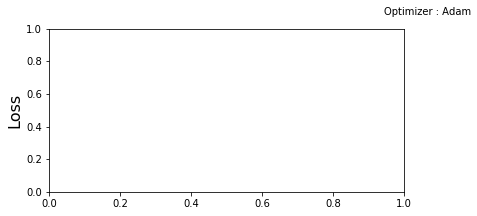

In [3]:
import seaborn as sns
plt.figure(figsize=(14,3))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(res.history['loss'], color='b', label='Training Loss')
plt.plot(res.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(res.history['acc'], color='b', label='Training Accuracy')
plt.plot(res.history['val_acc'], color='r', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [20]:
score = model.evaluate(test_pix, test_ind, verbose=0)
score

[0.79961926936605043, 0.68682084146001676]

In [ ]:
####  START LOADING FROM HERE!!!

In [1]:
from keras.layers import Activation, Convolution2D, Dropout, Conv2D
from keras.layers import AveragePooling2D, BatchNormalization
from keras.layers import GlobalAveragePooling2D
from keras.models import Sequential
from keras.layers import Flatten
from keras.models import Model
from keras.layers import Input
from keras.layers import MaxPooling2D
from keras.layers import SeparableConv2D
from keras.layers import Conv2D, Activation, MaxPool2D, Dropout, Dense, BatchNormalization, Flatten
from keras import layers
from keras.regularizers import l2
import keras

Using TensorFlow backend.
/Users/shreyashkawalkar/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
input_shape = (48, 48, 1) # SHAPE OF INPUT IMAGE
num_classes = 7 ## EMOTION CATEGORIES

In [3]:
def CNN_MODEL(input_shape, num_classes):

    model = Sequential()    
    model.add(Conv2D(64, (5, 5), activation='relu', input_shape = input_shape))
    model.add(keras.layers.convolutional.ZeroPadding2D(padding=(2, 2)))
    model.add(keras.layers.pooling.MaxPooling2D(pool_size=(5, 5),strides=(2, 2)))

    model.add(keras.layers.convolutional.ZeroPadding2D(padding=(1, 1)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(keras.layers.convolutional.ZeroPadding2D(padding=(1, 1)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(keras.layers.pooling.AveragePooling2D(pool_size=(3, 3),strides=(2, 2)))

    model.add(keras.layers.convolutional.ZeroPadding2D(padding=(1, 1)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(keras.layers.convolutional.ZeroPadding2D(padding=(1, 1)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(keras.layers.convolutional.ZeroPadding2D(padding=(1, 1)))
    model.add(keras.layers.pooling.AveragePooling2D(pool_size=(3, 3),strides=(2, 2)))

    model.add(Flatten())

    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.2))

    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])
    return model

In [4]:
model = simple_CNN((48, 48, 1), num_classes)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 44, 44, 64)        1664      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        36928     
_________________________________________________________________
zero_padding2d_3 (ZeroPaddin (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 64)        36928     
__________

In [5]:
model.load_weights("chkPt1.hdf5")
model_json = model.to_json()
with open("model1.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
from keras.models import model_from_json
import numpy as np

class FacialExpressionModel(object):
    EMOTIONS_LIST = ["ANGRY", "DISGUST", "FEAR", "HAPPY", "SAD", "SURPRISE", "NEUTRAL"]; ## dont change the order
    def __init__(self, model_json_file, model_weights_file):
        # load model from JSON file
        with open(model_json_file, "r") as json_file:
            loaded_model_json = json_file.read()
            self.loaded_model = model_from_json(loaded_model_json)

        # load weights into the new model
        self.loaded_model.load_weights(model_weights_file)
        print("Model loaded from disk")
        self.loaded_model.summary()

    def predict_emotion(self, img):
        self.preds = self.loaded_model.predict(img)
        self.preds[4:6] += 0.1
        self.preds[1:3] += 0.1
        lbl = np.argmax(self.preds)
        return FacialExpressionModel.EMOTIONS_LIST[lbl], lbl


if __name__ == '__main__':
    pass

In [ ]:
import cv2
import numpy as np
import time

rgb = cv2.VideoCapture(0)
facec = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
font = cv2.FONT_HERSHEY_SIMPLEX
emo_happy = cv2.imread('happy.png',1)
emo_sad = cv2.imread('sad.png',1)
emo_fear = cv2.imread('fear.png',1)
emo_disgust = cv2.imread('disgust.png',1)
emo_surprise = cv2.imread('surprise.png',1)
emo_angry = cv2.imread('angry.png',1)
emo_neutral = cv2.imread('neutral.png',1)
emoji = [emo_angry,emo_disgust,emo_fear,emo_happy,emo_sad,emo_surprise,emo_neutral] #fix order

def __get_data__():
    _, fr = rgb.read()
    gray = cv2.cvtColor(fr, cv2.COLOR_BGR2GRAY)
    gray = cv2.equalizeHist(gray)
    faces = facec.detectMultiScale(gray, 1.25, 5)
    return faces, fr, gray

def start_app(cnn):
    skip_frame = 10
    data = []
    flag = False
    emo=None
    while True:
        faces, fr, gray_fr = __get_data__()
        for (x, y, w, h) in faces:
            fc = gray_fr[y:y+h, x:x+w]
            fc = cv2.normalize(fc,None,0,255,cv2.NORM_MINMAX)
#             fc = cv2.addWeighted(fc,1.5,blur,-0.5,0)
            roi = cv2.resize(fc, (48, 48))
            pred, lbl = cnn.predict_emotion(roi[np.newaxis, :, :, np.newaxis])
            cv2.putText(fr, pred, (x, y), font, 1, (255, 255, 0), 2)
            cv2.rectangle(fr,(x,y),(x+w,y+h),(255,0,0),2)
            x1 = x + w//2
            y1 = y + h//2
            emo = emoji[lbl]
            emo = cv2.resize(emo,(h,w))
            fr[y:y+h,x:x+w] = cv2.addWeighted(fr[y:y+h,x:x+w],0.5,emo,0.5,0)

        if cv2.waitKey(1) == 27:
            cv2.destroyAllWindows()
            break
#         cv2.imshow("img",emo)
        cv2.imshow('Filter', fr)
    cv2.destroyAllWindows()

if __name__ == '__main__':
    model = FacialExpressionModel("model1.json", "chkPt1.hdf5")
    cap = cv2.VideoCapture('startV.mp4')
    while True:
        ret, frame = cap.read()
        if ret:
            frame = cv2.resize(frame, (1366, 800))
            cv2.imshow('Filter',frame)
            cv2.waitKey(1)
        else:
            break
    cap.release()
    start_app(model)
    

In [ ]:
from skimage import exposure
import numpy as np
def histogram_equalize(img):
#     img = rgb2gray(img)
    img_cdf, bin_centers = exposure.cumulative_distribution(img)
    return np.interp(img, bin_centers, img_cdf)